In [1]:
import os

import numpy as np

import keras
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt 
import skimage
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
from PIL import Image
import math

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Classificador

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc


def classification(X, y):
    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    # separar conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train, y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test, pred)

    return acuracia


# Descritor

In [4]:
def calcula_histograma(img):
    # convertendo a imagem em array numpy
    img = np.asarray(img)

    # achatando a matriz em array 1D
    flat = img.flatten()
    # coletando o histograma com a função numpy
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
    return histogram

def media_histograma(histograma):
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += histograma[i]*i
        total += histograma[i]
    return soma/total

def variancia_histograma(histograma,media):
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += (i-media)**2*histograma[i]
        total += histograma[i]
    return soma/total

def skewness_histograma(histograma,media,variancia):
    desvio_padrao = variancia**0.5
    soma = 0
    total = 0
    if desvio_padrao != 0:
        for i in range(len(histograma)):
            soma += ((i-media)/desvio_padrao)**3*histograma[i]
            total += histograma[i]
        return soma/total
    else:
        return 0

def kurtosis_histograma(histograma,media,variancia):
    desvio_padrao = variancia**0.5
    soma = 0
    total = 0
    if desvio_padrao != 0:
        for i in range(len(histograma)):
            soma += ((i-media)/desvio_padrao)**4*histograma[i]
            total += histograma[i]
        return soma/total-3
    else:
        return 0

def energia_histograma(histograma):
    soma = 0
    for i in range(len(histograma)):
        soma += histograma[i]**2
    return soma

def entropia_histograma(histograma):
    soma = 0
    total = sum(histograma)
    for i in range(len(histograma)):
        p = histograma[i]/total
        if p > 0:
            soma += -p*math.log2(p)
    return soma

def descritor_histograma(imagem, label):
    histograma = calcula_histograma(imagem)
    media = media_histograma(histograma)
    var = variancia_histograma(histograma,media)
    sk = skewness_histograma(histograma,media,var)
    kur = kurtosis_histograma(histograma,media,var)
    ener = energia_histograma(histograma)
    entr = entropia_histograma(histograma)

    return [media,var,sk,kur,ener,entr, label]

## Inicio

In [ ]:
result_images = list()
for x, y in zip(x_train, y_train):
  result_images.append(descritor_histograma(x, int(y)))

In [2]:
result_images[0]

In [7]:
np.savetxt("dataset_descritor_normal.csv", result_images, delimiter=",")

In [8]:
import pandas as pd

data_frame = pd.read_csv("dataset_descritor_normal.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

In [9]:
data_frame.head()

,Media,Variancia,Skewness,Kurtosis,Energia,Entropia,Classe
0,103.447266,2701.267401,0.479836,-0.228650,56096.0,7.590513,6.0
1,130.347331,3657.733854,0.163637,-0.874138,45938.0,7.800278,9.0
2,133.740560,6816.689527,0.510826,-1.413397,229058.0,6.736022,9.0
3,80.224284,1330.200673,1.280878,2.591452,91834.0,6.981927,4.0
4,103.474935,3666.254580,0.415014,-0.618705,52804.0,7.691491,1.0


In [10]:
data_frame.to_csv('dataset_descritor_normal.csv', index=False)


In [11]:
acc_gen = classification(result_images, data_frame.Classe)
print(acc_gen)

0.2739333333333333


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Negativa

In [7]:
def negativa(imagem):
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            imagem[i, j] = 255 - 1 - imagem[i, j]
    return imagem

def negative_s1mple(image):
    return 255 - image

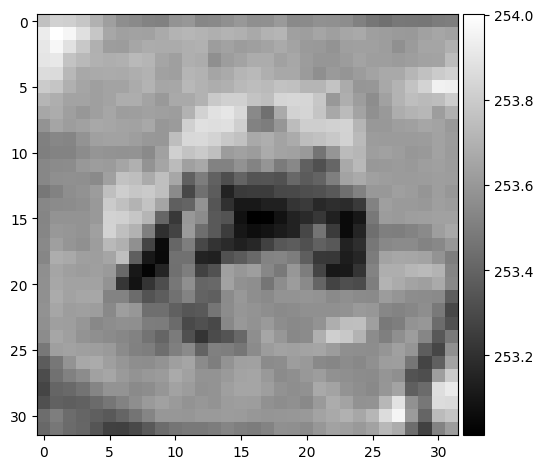

In [ ]:
result_images_negativa = list()
for x, y in zip(x_train, y_train):
    result_images_negativa.append(descritor_histograma(negativa(rgb2gray(x)), int(y)))

In [15]:
np.savetxt("result_images_negativa.csv", result_images_negativa, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_negativa.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_negativa.csv', index=False)

In [16]:
for x in range(5):
    print(result_images_negativa[x])

[253.0009765625, 0.0009756088256835938, 31.953105913464917, 1019.0009775171067, 1046530, 0.011173818721219527, 6]
[253.0, 0.0, 0, 0, 1048576, 0.0, 9]
[253.0, 0.0, 0, 0, 1048576, 0.0, 9]
[253.0, 0.0, 0, 0, 1048576, 0.0, 4]
[253.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [17]:
acc_gen = classification(result_images_negativa, data_frame.Classe)
print(acc_gen)

0.1014


# Logarítmico

In [76]:
import math

def logaritmica(c,r):
    return c * np.log(1 + r)


def log_aplicada(imagem):
    c = 255 / np.log(1 + np.max(imagem))
    # Cria uma imagem resultado com o mesmo shape da imagem de entrada
    result = np.empty_like(imagem)
    
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            result[i, j] = logaritmica(c, imagem[i][j])
    return result


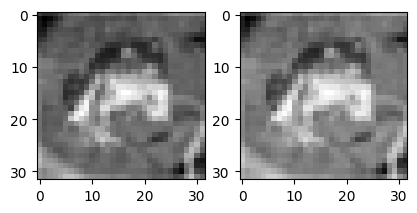

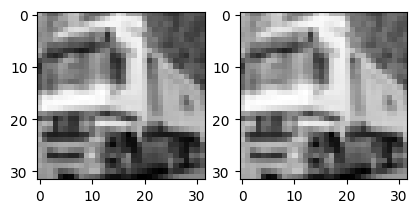

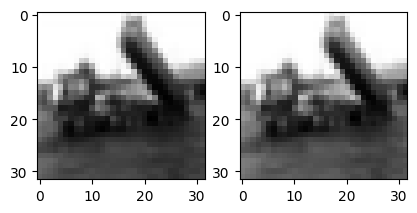

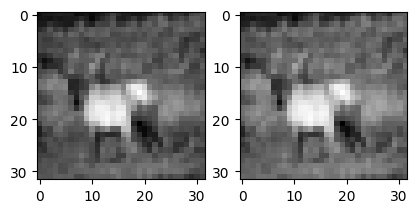

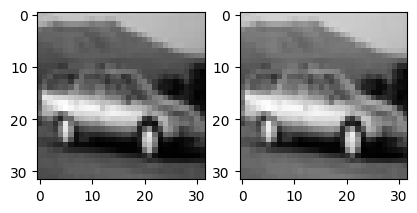

In [85]:
for x in range(5):
    plt.figure(figsize=(10,10))
    plt.subplot(4,4,1)
    plt.imshow(rgb2gray(x_train[x]), cmap='gray')
    plt.subplot(4,4,2)
    plt.imshow(log_aplicada(rgb2gray(x_train[x])), cmap='gray')

# result_images_negativa = list()
# for x, y in zip(x_train, y_train):
#     plt.figure(figsize=(10,10))
#     plt.subplot(4,4,1)
#     plt.imshow(rgb2gray(x), cmap='gray')
#     plt.subplot(4,4,2)
#     plt.imshow(log_aplicada(rgb2gray(x)), cmap='gray')
#     break

# result_images_negativa = list()
# for x, y in zip(x_train, y_train):
#     result_images_negativa.append(descritor_histograma(log_aplicada(rgb2gray(x)), int(y)))

In [20]:
result_images_log[0]


[130.107421875,
 1660.8029136657715,
 0.4784514915070791,
 0.8980111899061738,
 10682,
 7.061506973489457,
 6]

In [21]:
np.savetxt("result_images_log.csv", result_images_log, delimiter=",")

In [22]:
import pandas as pd

data_frame = pd.read_csv("result_images_log.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

In [23]:
data_frame.to_csv('result_images_log.csv', index=False)

In [24]:
acc_gen = classification(result_images_log, data_frame.Classe)
print(acc_gen)


0.3854


# Alargamento de contraste

In [9]:
def alargamento_de_contraste(imagem, k, e):
    altura, largura = imagem.shape

    # Aplica a função de atenuação para cada pixel da imagem
    for i in range(altura):
        for j in range(largura):
            if (imagem[i, j] != 0):
                imagem[i, j] = 1/(1+((k/imagem[i, j])**e))
            else:
                imagem[i, j] = 0
    return imagem

In [ ]:
# imagem = imread("Elden_ring_Wallpaper.jpg")
# imagem = rgb2gray(imagem)

# # exmplo de aplicação do alargamento de contraste
# imagem_com_contraste_alargado = alargamento_de_contraste(imagem, 1, 2)

# #imsave("img.jpg",imagem_com_contraste_alargado)

# imshow(imagem_com_contraste_alargado, cmap="gray")

### k = 1 - e = 2

In [27]:
result_images_ac_12 = list()
for x, y in zip(x_train, y_train):
    result_images_ac_12.append(descritor_histograma(alargamento_de_contraste(rgb2gray(x), 1, 2), int(y)))


In [28]:
for x in range(5):
    print(result_images_ac_12[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [29]:
np.savetxt("result_images_ac_12.csv", result_images_ac_12, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_ac_12.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_ac_12.csv', index=False)

In [30]:
acc_gen = classification(result_images_ac_12, data_frame.Classe)
print(acc_gen)


0.1002


### k=0.4, - e=4

In [31]:
result_images_ac_044 = list()
for x, y in zip(x_train, y_train):
    result_images_ac_044.append(descritor_histograma(alargamento_de_contraste(rgb2gray(x), 0.4, 4), int(y)))


In [32]:
for x in range(5):
    print(result_images_ac_044[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [33]:
np.savetxt("result_images_ac_044.csv", result_images_ac_12, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_ac_044.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_ac_044.csv', index=False)

In [34]:
acc_gen = classification(result_images_ac_044, data_frame.Classe)
print(acc_gen)


0.09706666666666666


### k=1, e=16

In [35]:
result_images_ac_116 = list()
for x, y in zip(x_train, y_train):
    result_images_ac_116.append(descritor_histograma(alargamento_de_contraste(rgb2gray(x), 1, 16), int(y)))


In [36]:
for x in range(5):
    print(result_images_ac_116[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [37]:
np.savetxt("result_images_ac_116.csv", result_images_ac_12, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_ac_116.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_ac_116.csv', index=False)

In [38]:
acc_gen = classification(result_images_ac_116, data_frame.Classe)
print(acc_gen)


0.0984


### k=0.1, e=6

In [39]:
result_images_ac_016 = list()
for x, y in zip(x_train, y_train):
    result_images_ac_016.append(descritor_histograma(alargamento_de_contraste(rgb2gray(x), 0.1, 6), int(y)))


In [40]:
for x in range(5):
    print(result_images_ac_016[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [41]:
np.savetxt("result_images_ac_016.csv", result_images_ac_12, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_ac_016.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_ac_016.csv', index=False)

In [42]:
acc_gen = classification(result_images_ac_016, data_frame.Classe)
print(acc_gen)


0.1022


# Potencia

### Y = 3

In [10]:
def potencia(imagem, c, y):
    altura, largura = imagem.shape[:2]
    result = np.empty_like(imagem)
    for i in range(altura):
        for j in range(largura):
            result[i, j] = c*(imagem[i, j] ** y)
    return result

In [44]:
result_images_p_3 = list()
for x, y in zip(x_train, y_train):
    result_images_p_3.append(descritor_histograma(potencia(rgb2gray(x), 1, 3), int(y)))


In [45]:
for x in range(5):
    print(result_images_p_3[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0966796875, 0.08733272552490234, 2.729553328011998, 5.4504613704613725, 865426, 0.45838120689816386, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [60]:
np.savetxt("result_images_p_3.csv", result_images_p_3, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_p_3.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_p_3.csv', index=False)

In [47]:
acc_gen = classification(result_images_p_3, data_frame.Classe)
print(acc_gen)


0.1018


### Y = 4

In [48]:
result_images_p_4 = list()
for x, y in zip(x_train, y_train):
    result_images_p_4.append(descritor_histograma(potencia(rgb2gray(x), 1, 3), int(y)))


In [49]:
for x in range(5):
    print(result_images_p_4[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0966796875, 0.08733272552490234, 2.729553328011998, 5.4504613704613725, 865426, 0.45838120689816386, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [61]:
np.savetxt("result_images_p_4.csv", result_images_p_4, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_p_4.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_p_4.csv', index=False)

In [51]:
acc_gen = classification(result_images_p_4, data_frame.Classe)
print(acc_gen)


0.09606666666666666


### Y = 5

In [52]:
result_images_p_5 = list()
for x, y in zip(x_train, y_train):
    result_images_p_5.append(descritor_histograma(potencia(rgb2gray(x), 1, 3), int(y)))


In [53]:
for x in range(5):
    print(result_images_p_5[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0966796875, 0.08733272552490234, 2.729553328011998, 5.4504613704613725, 865426, 0.45838120689816386, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [62]:
np.savetxt("result_images_p_5.csv", result_images_p_5, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_p_5.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_p_5.csv', index=False)

In [55]:
acc_gen = classification(result_images_p_5, data_frame.Classe)
print(acc_gen)


0.1008


### Y = 0.4

In [56]:
result_images_p_04 = list()
for x, y in zip(x_train, y_train):
    result_images_p_04.append(descritor_histograma(potencia(rgb2gray(x), 1, 3), int(y)))


In [57]:
for x in range(5):
    print(result_images_p_04[x])

[0.0, 0.0, 0, 0, 1048576, 0.0, 6]
[0.0, 0.0, 0, 0, 1048576, 0.0, 9]
[0.0966796875, 0.08733272552490234, 2.729553328011998, 5.4504613704613725, 865426, 0.45838120689816386, 9]
[0.0, 0.0, 0, 0, 1048576, 0.0, 4]
[0.0, 0.0, 0, 0, 1048576, 0.0, 1]


In [58]:
np.savetxt("result_images_p_04.csv", result_images_p_04, delimiter=",")

import pandas as pd

data_frame = pd.read_csv("result_images_p_04.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

data_frame.to_csv('result_images_p_04.csv', index=False)

In [59]:
acc_gen = classification(result_images_p_04, data_frame.Classe)
print(acc_gen)


0.0996


# Plots

In [86]:
def PlotScatterMatrix(df1, df2):
    ax = pd.plotting.scatter_matrix(df1, alpha=0.2, figsize=(6,6), diagonal='kde')
    pd.plotting.scatter_matrix(df2, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    
    plt.show()

In [71]:
import pandas as pd

data_frame = pd.read_csv("dataset_descritor_normal.csv", sep=',')

In [78]:
data_frame.head()

,Media,Variancia,Skewness,Kurtosis,Energia,Entropia,Classe
0,103.447266,2701.267401,0.479836,-0.228650,56096.0,7.590513,6.0
1,130.347331,3657.733854,0.163637,-0.874138,45938.0,7.800278,9.0
2,133.740560,6816.689527,0.510826,-1.413397,229058.0,6.736022,9.0
3,80.224284,1330.200673,1.280878,2.591452,91834.0,6.981927,4.0
4,103.474935,3666.254580,0.415014,-0.618705,52804.0,7.691491,1.0


In [76]:
data_frame0 = data_frame[data_frame['Classe'] == 0]
data_frame1 = data_frame[data_frame['Classe'] == 1]
data_frame2 = data_frame[data_frame['Classe'] == 2]
data_frame3 = data_frame[data_frame['Classe'] == 3]
data_frame4 = data_frame[data_frame['Classe'] == 4]
data_frame5 = data_frame[data_frame['Classe'] == 5]
data_frame6 = data_frame[data_frame['Classe'] == 6]
data_frame7 = data_frame[data_frame['Classe'] == 7]
data_frame8 = data_frame[data_frame['Classe'] == 8]
data_frame9 = data_frame[data_frame['Classe'] == 9]

In [83]:
data_frame0 = data_frame0.drop('Classe', axis=1)
data_frame1 = data_frame1.drop('Classe', axis=1)
data_frame2 = data_frame2.drop('Classe', axis=1)
data_frame3 = data_frame3.drop('Classe', axis=1)
data_frame4 = data_frame4.drop('Classe', axis=1)
data_frame5 = data_frame5.drop('Classe', axis=1)
data_frame6 = data_frame6.drop('Classe', axis=1)
data_frame7 = data_frame7.drop('Classe', axis=1)
data_frame8 = data_frame8.drop('Classe', axis=1)
data_frame9 = data_frame9.drop('Classe', axis=1)

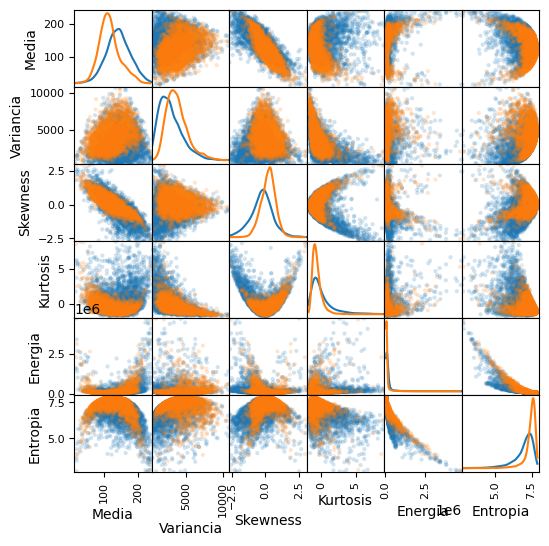

In [89]:
PlotScatterMatrix(data_frame0, data_frame1)

In [87]:
def PlotScatterMatrix_CONFUSION(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10):
    ax = pd.plotting.scatter_matrix(df1, alpha=0.2, figsize=(6,6), diagonal='kde')
    ax = pd.plotting.scatter_matrix(df2, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    ax = pd.plotting.scatter_matrix(df3, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    ax = pd.plotting.scatter_matrix(df4, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    ax = pd.plotting.scatter_matrix(df5, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    ax = pd.plotting.scatter_matrix(df6, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    ax = pd.plotting.scatter_matrix(df7, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    ax = pd.plotting.scatter_matrix(df8, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    ax = pd.plotting.scatter_matrix(df9, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    pd.plotting.scatter_matrix(df10, alpha=0.2, figsize=(6,6), diagonal='kde', ax=ax)
    
    plt.show()

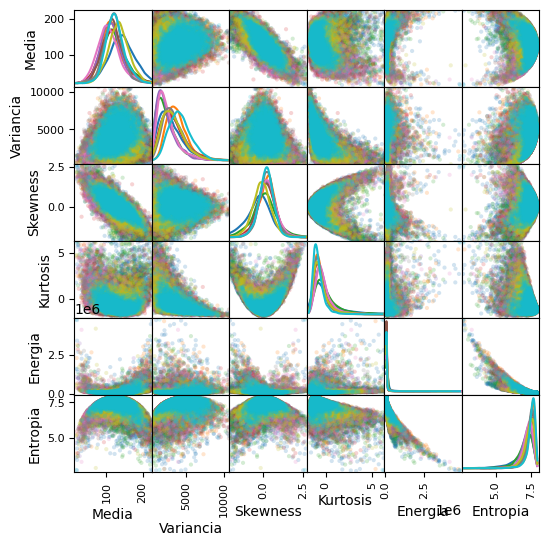

In [93]:
PlotScatterMatrix_CONFUSION(data_frame0, data_frame1, data_frame2, data_frame3, data_frame4, data_frame5, data_frame6, data_frame7, data_frame8, data_frame9)

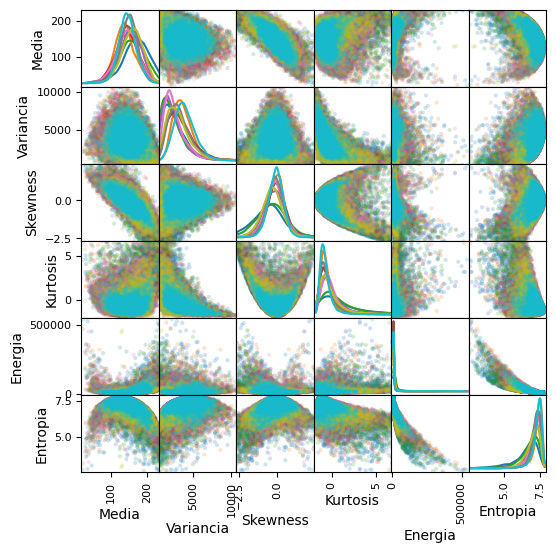

In [88]:
import pandas as pd

data_frame = pd.read_csv("result_images_log.csv", sep=',')

data_frame0 = data_frame[data_frame['Classe'] == 0]
data_frame1 = data_frame[data_frame['Classe'] == 1]
data_frame2 = data_frame[data_frame['Classe'] == 2]
data_frame3 = data_frame[data_frame['Classe'] == 3]
data_frame4 = data_frame[data_frame['Classe'] == 4]
data_frame5 = data_frame[data_frame['Classe'] == 5]
data_frame6 = data_frame[data_frame['Classe'] == 6]
data_frame7 = data_frame[data_frame['Classe'] == 7]
data_frame8 = data_frame[data_frame['Classe'] == 8]
data_frame9 = data_frame[data_frame['Classe'] == 9]

data_frame0 = data_frame0.drop('Classe', axis=1)
data_frame1 = data_frame1.drop('Classe', axis=1)
data_frame2 = data_frame2.drop('Classe', axis=1)
data_frame3 = data_frame3.drop('Classe', axis=1)
data_frame4 = data_frame4.drop('Classe', axis=1)
data_frame5 = data_frame5.drop('Classe', axis=1)
data_frame6 = data_frame6.drop('Classe', axis=1)
data_frame7 = data_frame7.drop('Classe', axis=1)
data_frame8 = data_frame8.drop('Classe', axis=1)
data_frame9 = data_frame9.drop('Classe', axis=1)

PlotScatterMatrix_CONFUSION(data_frame0, data_frame1, data_frame2, data_frame3, data_frame4, data_frame5, data_frame6, data_frame7, data_frame8, data_frame9)

## Normal

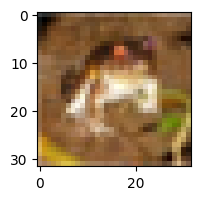

In [3]:
for x, y in zip(x_train, y_train):
    plt.figure(figsize=(2,2))
    plt.imshow(x, cmap="gray")
    break

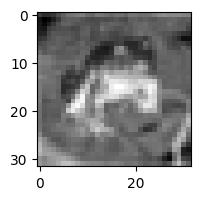

In [36]:
for x, y in zip(x_train, y_train):
    plt.figure(figsize=(2,2))
    plt.imshow(rgb2gray(x), cmap="gray")
    break

## Negativa

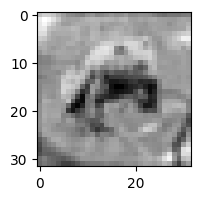

In [30]:
for x, y in zip(x_train, y_train):
    plt.figure(figsize=(2,2))
    plt.imshow(negativa(rgb2gray(x)), cmap="gray")
    break

## Log

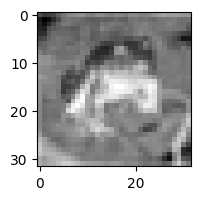

In [45]:
for x, y in zip(x_train, y_train):
    plt.figure(figsize=(2,2))
    plt.imshow(log_aplicada(rgb2gray(x)), cmap="gray")
    break

## Alg de Contraste

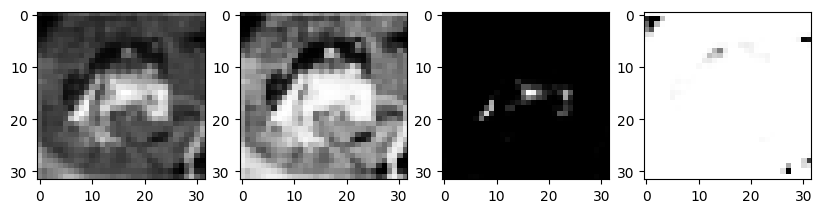

In [39]:
for x, y in zip(x_train, y_train):
    plt.figure(figsize=(10,10))
    plt.subplot(4,4,1)
    plt.imshow(alargamento_de_contraste(rgb2gray(x), 1, 2), cmap='gray')
    plt.subplot(4,4,2)
    plt.imshow(alargamento_de_contraste(rgb2gray(x), 0.4, 4), cmap='gray')
    plt.subplot(4,4,3)
    plt.imshow(alargamento_de_contraste(rgb2gray(x), 1, 16), cmap='gray')
    plt.subplot(4,4,4)
    plt.imshow(alargamento_de_contraste(rgb2gray(x), 0.1, 6), cmap='gray')
    break

## Potencia

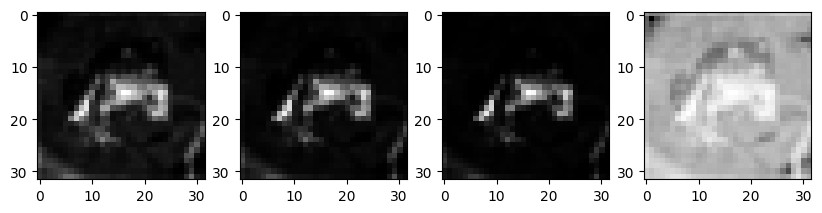

In [21]:
for x, y in zip(x_train, y_train):
    plt.figure(figsize=(10,10))
    plt.subplot(4,4,1)
    plt.imshow(potencia(rgb2gray(x), 1, 3), cmap='gray')
    plt.subplot(4,4,2)
    plt.imshow(potencia(rgb2gray(x), 1, 4), cmap='gray')
    plt.subplot(4,4,3)
    plt.imshow(potencia(rgb2gray(x), 1, 5), cmap='gray')
    plt.subplot(4,4,4)
    plt.imshow(potencia(rgb2gray(x), 1, 0.4), cmap='gray')
    break